# Combine data and plot the figure

Figure 4a,b in the revised version

Run figure3a.ipynb and figure3b.ipynb, create two data structures
in the same folder, figure3a.p and figure3b.p


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

import seaborn as sns # better looking plots

from algae_population import *

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [2]:
tmp = list(scenarios.keys())

with open('figure3a.p','rb') as f:
    sigmas = pickle.load(f)
    data_a = pickle.load(f)
    settling_time_a = pickle.load(f)

with open('figure3b.p','rb') as f:
    gammas = pickle.load(f)
    data_b = pickle.load(f)
    settling_time_b = pickle.load(f)


In [3]:
np.arange(0,11,2)

array([ 0,  2,  4,  6,  8, 10])

In [4]:
list(scenarios.keys())[::2]

['100/0', '80/20', '60/40', '40/60', '20/80', '0/100']

In [5]:
list(scenarios.keys())

['100/0',
 '90/10',
 '80/20',
 '70/30',
 '60/40',
 '50/50',
 '40/60',
 '30/70',
 '20/80',
 '10/90',
 '0/100']

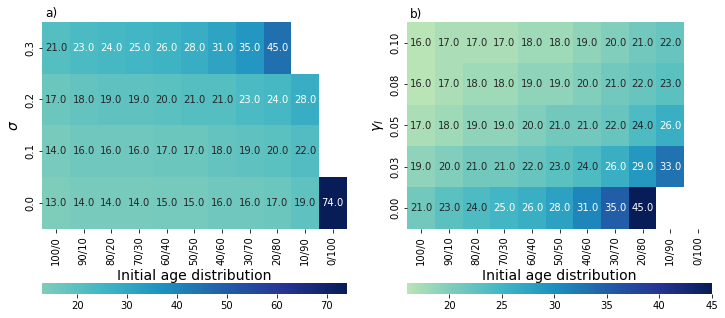

In [8]:
grid_kws = {"height_ratios": (.95, .05), "hspace": .5}
f, ax = plt.subplots(2,2, gridspec_kw=grid_kws, figsize=(12,5))

# part a

settling_time_a[settling_time_a == 0] = np.nan
hmap = sns.heatmap(settling_time_a,ax=ax[0,0], 
    cbar_ax=ax[1,0], 
    cbar_kws={"orientation": "horizontal"}, 
    center=25,
    cmap="YlGnBu",
    annot=True, fmt=".1f",# 
    yticklabels=[f'{g:.1f}' for g in sigmas],
    xticklabels = list(scenarios.keys()))

ax[0,0].invert_yaxis()
ax[0,0].set_ylim([0,4])
# ax[0,0].set_xlim([0,10])

# ax[0,0].set_xticks(ticks=np.arange(11)+0.5,labels=scenarios.keys())
# ax[0,0].set_xticks(np.arange(0,11,2),labels=list(scenarios.keys())[::2])
# ax[0,0].set_yticks(ticks=np.arange(len(sigmas[:-1])),labels=np.round(sigmas[:-1],2))
ax[0,0].set_xlabel(r'Initial age distribution',fontsize=14);
ax[0,0].set_ylabel(r'$\sigma$',fontsize=14);
ax[0,0].text(0.1,4.1,'a)',color='black',fontsize=12);


# part b

settling_time_b[settling_time_b == 0] = np.nan

hmap = sns.heatmap(settling_time_b, ax=ax[0,1], 
    cbar_ax=ax[1,1], 
    cbar_kws={"orientation": "horizontal"}, 
    center=25,
    cmap="YlGnBu",
    annot=True, fmt=".1f",
    yticklabels=[f'{g:.2f}' for g in gammas],
    xticklabels = list(scenarios.keys()))

ax[0,1].invert_yaxis()
# ax[0,1].set_ylim([0,4])
# ax[0,1].set_xlim([0,10])
# ax[0,1].set_xticks(np.arange(0,11,2),labels=list(scenarios.keys())[::2])
# ax[0,1].set_yticks(ticks = gammas, labels=np.round(gammas,2))
# ax[0,1].set_yticks(ticks=np.arange(len(gammas)),labels=np.round(gammas,2))
ax[0,1].set_xlabel(r'Initial age distribution',fontsize=14);
ax[0,1].set_ylabel(r'$\gamma_I$',fontsize=14);
ax[0,1].text(0.1,5.1,'b)',color='black',fontsize=12);


f.savefig('figure4.png',dpi=300,facecolor=f.get_facecolor(), edgecolor='none')